# Pandas & Visualization Exercise
_Author: B Rhodes (DC)_


Complete the following exercises in class. You will need to use the available documentation for matplotlib and seaborn. For all the tasks below, once you determine the correct method to use you can write it in a cell and then use the `shift-tab` trick to get details on what parameters to set.

Documentation can be found at the following sites:

- [Matplotlib Documentation](https://matplotlib.org/)
    - The [examples gallery](https://matplotlib.org/gallery/index.html) is very helpful. 
- [Seaborn Documentation](https://seaborn.pydata.org/)
    - The [examples gallery](https://seaborn.pydata.org/examples/index.html) is very helpful.

Note, most of the matplotlib tasks can be done by referring to the other notebooks in this lesson. The seaborn tasks are not all covered in this lesson and the documentation may be necessary. Although, in most cases you are asked to use a specific seaborn method so you should be able to figure out what needs to be done without referring to the documentation.

**```shift-tab``` is your friend.**

Also, don't forget to use `;` to supress extraneous output when executing various plot commands.



##### An example problem
Use `.random()` from the `random` module to generate a random number. 

Now, if you didn't want to first look at the documentation you could simply write the python and use `shift-tab` to inspect the docstring.

In [1]:
#
import random

# use shift-tab to determine what arguments and parameters you need.
random.random()

0.650600749939065

###### 1. import pandas and matplotlib

Read all the questions and import all the necessary libraries here.
Remember we use the magic ```%inline matplotlib```

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###### 2. Create a dataframe from the following data set & verify the result. 

[Auto MPG Dataset](https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Auto%20MPG/auto-mpg.data)

Use this path: ```'./datasets/autoMPG.csv'```

Here is the [data dictionary](https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Auto%20MPG).

You will need to do some data cleaning to get this data ready to plot. Use the simplest solution you can think of to clean the data. In the end all your data needs to be numerical.


In [4]:
# 2. Answer
path = '../data/autoMPG.csv'

df = pd.read_csv(path)

# verify the result
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


###### 3. Explore the data
Use standard methods.



In [5]:
# 3. Answer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Look at all the values for any non-numeric columns. use the pandas attirbute `.values` to look at all the values in a series.

In [6]:
## We can see all the values in a given column
# we want to look at horsepower, since it has data type object, which means it contains string data.
df['horsepower'].values

array(['130.0', '165.0', '150.0', '150.0', '140.0', '198.0', '220.0',
       '215.0', '225.0', '190.0', '170.0', '160.0', '150.0', '225.0',
       '95.00', '95.00', '97.00', '85.00', '88.00', '46.00', '87.00',
       '90.00', '95.00', '113.0', '90.00', '215.0', '200.0', '210.0',
       '193.0', '88.00', '90.00', '95.00', '?', '100.0', '105.0', '100.0',
       '88.00', '100.0', '165.0', '175.0', '153.0', '150.0', '180.0',
       '170.0', '175.0', '110.0', '72.00', '100.0', '88.00', '86.00',
       '90.00', '70.00', '76.00', '65.00', '69.00', '60.00', '70.00',
       '95.00', '80.00', '54.00', '90.00', '86.00', '165.0', '175.0',
       '150.0', '153.0', '150.0', '208.0', '155.0', '160.0', '190.0',
       '97.00', '150.0', '130.0', '140.0', '150.0', '112.0', '76.00',
       '87.00', '69.00', '86.00', '92.00', '97.00', '80.00', '88.00',
       '175.0', '150.0', '145.0', '137.0', '150.0', '198.0', '150.0',
       '158.0', '150.0', '215.0', '225.0', '175.0', '105.0', '100.0',
       '100.0',

We need to convert the horsepower column to floats. But the `?` won't convert since it is non-numeric. The simplest thing to do is to drop them since we don't have any knowledge as to what they should be and it doesn't make sense to impute a value.


In [7]:
#create a boolean to flag the rows containing question marks
is_question = df['horsepower'] == '?'
df[is_question]

# create a new dataframe excluding rows containing a question mark.
auto_df = df[~is_question].copy(deep=True)


In [8]:
# Check the results
auto_df.info()

# the result still has horsepower as data type 'object', which means string. 
# But we can be sure we've removed non-numerical values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [9]:
# Convert horsepower to floats
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

###### 4.  Generate summary statistics on the data set?


In [10]:
# Generate summary stats

auto_df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


###### 5. generate a scatter plot of  displacement vs  horsepower?


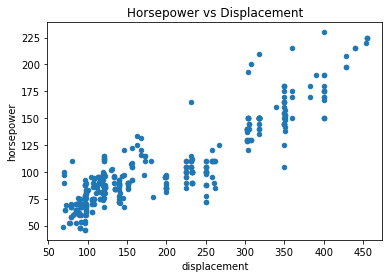

In [11]:
# 5. Answer
ax = auto_df.plot(kind='scatter', x='displacement', y='horsepower');
ax.set_title('Horsepower vs Displacement');

###### 6. generate a scatter plot of  displacement vs  horsepower and vary color by mpg for each point?
###### Bonus points: use a reverse color gradient


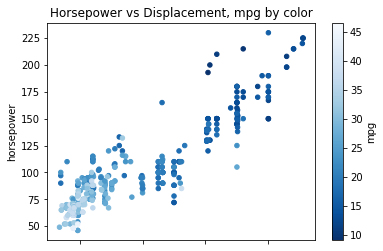

In [12]:
# 6. answer
ax = auto_df.plot(kind='scatter', x='displacement', y='horsepower', c='mpg', colormap='Blues_r');
ax.set_title('Horsepower vs Displacement, mpg by color');



###### 7. Use seaborn's lmplot to create a scatterplot of displacement vs  horsepower with a trend line. What does this show?


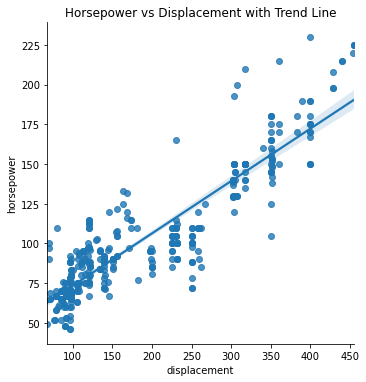

In [13]:
# 7. answer
ax = sns.lmplot(x="displacement",y="horsepower", data=auto_df, fit_reg=True);
plt.title('Horsepower vs Displacement with Trend Line');

###### 8. Use seaborn to create a lineplot of mpg vs displacement.

Use seaborn `.lineplot()` and be sure to give it a title.

What does this show? What can you conclude?

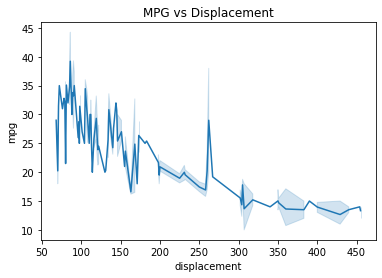

In [14]:
# 8. answer
sns.lineplot(x= "displacement", y="mpg", data=auto_df);
plt.title("MPG vs Displacement");

###### 9. Create a barplot of mpg vs model year - use seaborn

Use seaborn `.barplot()` and be sure to give it a title.

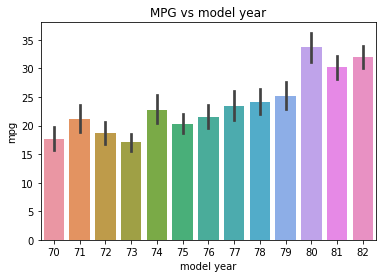

In [15]:
sns.barplot(x="model year", y="mpg", data=auto_df);
plt.title("MPG vs model year");

###### 10. Create a scatter plot of mpg vs displacement and use cylinders to set the hue.

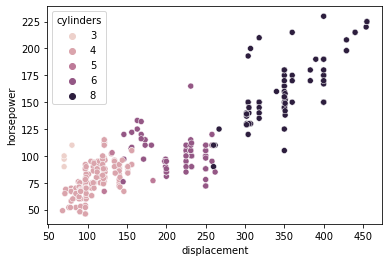

In [16]:
sns.scatterplot(x='displacement', y='horsepower', data=auto_df, hue='cylinders'); 


###### 11. Use seaborn `.swarmplot()` to plot a mpg vs year

/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/austinlasseter/

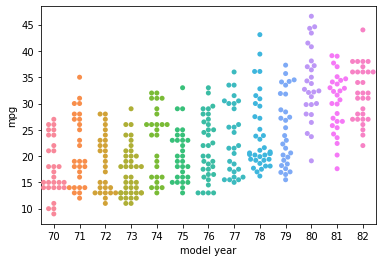

In [17]:
sns.swarmplot(x='model year', y='mpg', data=auto_df);


###### 12. Repeat the last exercise, but add hue coded by cylinders.

What does this tell you?

/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/austinlasseter/

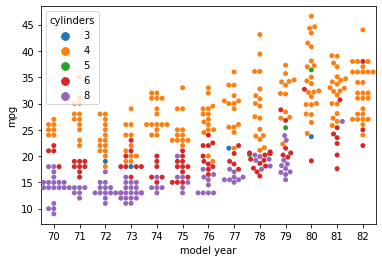

In [18]:
sns.swarmplot(x='model year', y='mpg', data=auto_df,  hue='cylinders');


###### 13. Create a seaborn countplot of model year and cylinders.

Plot model year using `.countplot()` and set hue=cylinders. What does this tell you about the number of cylinders vs model year?

<AxesSubplot:xlabel='model year', ylabel='count'>

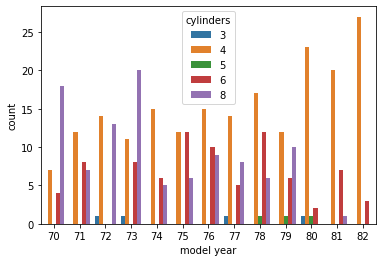

In [19]:
sns.countplot(x='model year', hue='cylinders', data=auto_df)

###### 14. Create a histogram using seaborn's `.distplot()`

Create a histogram of acceleration using seaborn's `'.distplot()`. Use `bins = 10`


/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acceleration'>

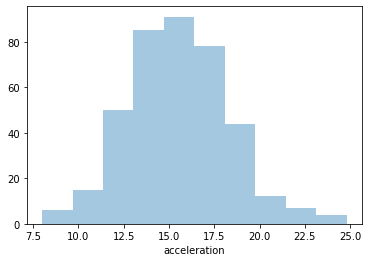

In [20]:
sns.distplot(a=auto_df['acceleration'], kde=False, bins=10)


###### 15. Repeat 11 but add a density plot Create a histogram using seaborn's `.distplot()`

Create a histogram of acceleration using seaborn's `'.distplot()` and add a density plot.


<AxesSubplot:xlabel='acceleration', ylabel='Density'>

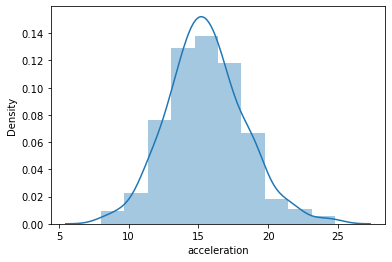

In [21]:
sns.distplot(a=auto_df['acceleration'], bins=10, kde=True)


###### 16. Add mpg to the above plot.

You can plot two histograms in the same plot.

/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/austinlasseter/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

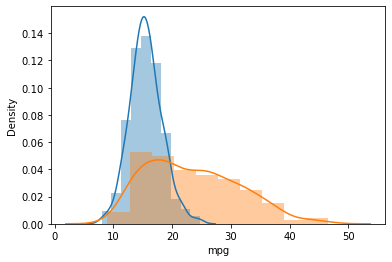

In [22]:
sns.distplot(a=auto_df['acceleration'], bins=10, kde=True)
sns.distplot(a=auto_df['mpg'], bins=10)

###### 17. Create a density plot using seaborn's `.kdeplot()`

Create density plots of mpg and acceleration on the same graph. Use the `shade` parameter to fill in under the curves.

<AxesSubplot:xlabel='mpg', ylabel='Density'>

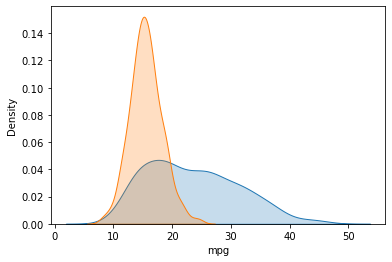

In [23]:
sns.kdeplot(data=auto_df['mpg'], shade=True)
sns.kdeplot(data=auto_df['acceleration'], shade=True)


###### 18. Create a seaborn `jointplot` of displacement vs mpg

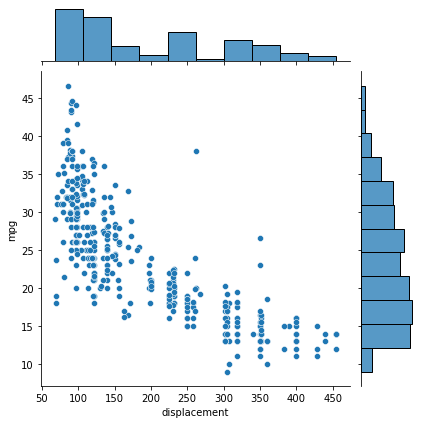

In [24]:
sns.jointplot(x="displacement", y="mpg", data=auto_df);


###### 19. Repeat the above, but change the kind of plot to a density plot.
Use seaborn to create a jointplot, but change the kind to a density plot. The command should be the same, but you need to set a new parameter. Use `shift-tab` to figure out which parameter that is.

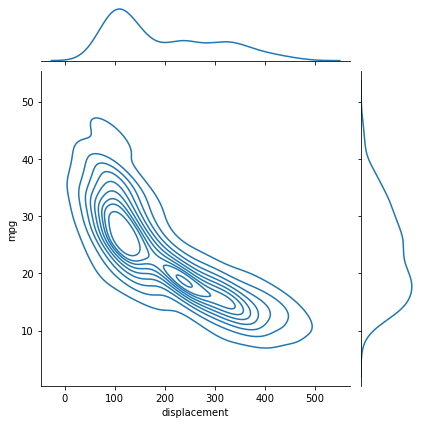

In [25]:
sns.jointplot(x="displacement", y="mpg", data=auto_df, kind='kde');


###### 20. Use seaborn to create a boxplot of mpg vs model year 

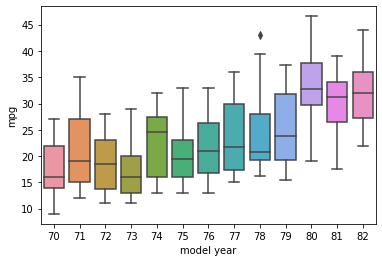

In [26]:
sns.boxplot(x="model year", y="mpg", data=auto_df);

###### 21. Use seaborn to create a correlation heatmap
Include the following:

1. Use a diverging color map.
2. Set the center to zero.
3. set linewidths to 0.5
4. set square to True
5. add numerical values in the squares
6. Set the title to 'Correlation Heatmap w/ annotation'

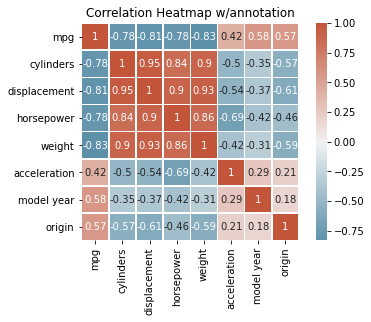

In [27]:
corr = auto_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
hm = sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True);

hm.set_title('Correlation Heatmap w/annotation');

###### 22. BONUS: Create a diagonal heatmap.
Repeat the above, but make it a diagonal display.
Refer to the seaborn documentation for an example.

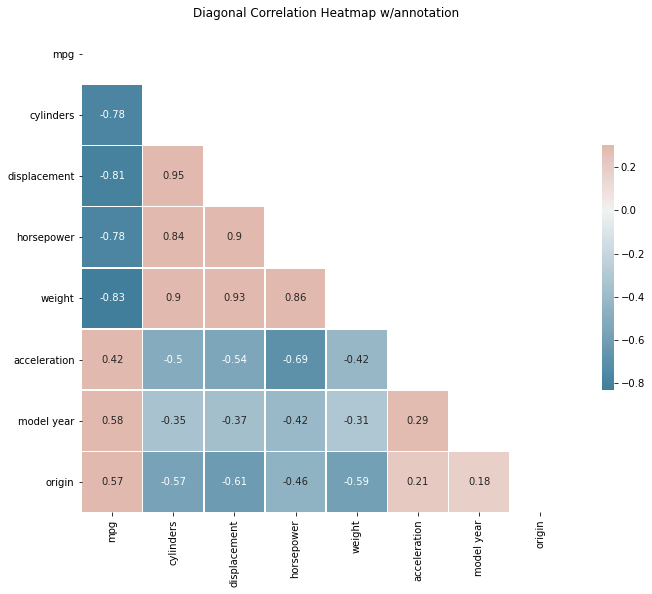

In [28]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

hm.set_title('Diagonal Correlation Heatmap w/annotation');